[Abrir no Google Colab](https://colab.research.google.com/drive/1n8k49HlUKpwaJYRcHKuGl1_5fUelNyWe#scrollTo=kl12UKhTsHzZ)

In [ ]:

#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   #função parecida com 
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# Essa biblioteca vai dividir os dados em dados de teste e de treino 
from sklearn.model_selection import train_test_split



In [2]:
Dados =pd.read_excel('BaseDados_RegressaoLinear.xlsx')
Dados




,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [271]:
#Mostra os 5 primeiros registros 
Dados.head()  


,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [272]:
#Mostra os 5 ultimos registros, se colocar 15 entre () vai mostrar os ultimos 15 registros 
Dados.tail()  


,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [273]:
# Mostra o nome das colunas 
Dados.columns    

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [274]:
#Lista todas as coluans da base de dados, quantidade de valores, se tem valor nulo, formato do campo  
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:

#Gera uma tabela estatistica com base nos dados 
Dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910



### Estatísticas Descritivas

- **`count`**: Refere-se à quantidade de **registros** na base de dados. Ele indica quantas observações ou entradas existem na coluna.

- **`mean`**: A **média** dos valores da coluna. Ela é calculada somando todos os valores e dividindo pelo número de observações.

- **`std`**: O **desvio padrão**. Ele indica o quanto os valores da variável estão **desviando** da média. No seu caso, o **salário** está se desviando **600 reais** da média, tanto para cima quanto para baixo.

- **`min`**: O **valor mínimo**. Este é o menor valor presente na coluna.

- **`25%`**: Representa o **percentil 25%**. Isso significa que **25%** dos dados têm valores até esse ponto. Por exemplo, 25% dos salários são menores ou iguais a **1595 reais**.

- **`50%`**: A **mediana**. A mediana é o valor que separa os **50% menores** dos **50% maiores**. No seu caso, a mediana dos salários é **2035 reais**.

- **`75%`**: Representa o **percentil 75%** (ou terceiro quartil). Isso significa que **75%** dos dados têm valores menores ou iguais a esse ponto. Por exemplo, 75% dos salários são menores ou iguais a **2597 reais.**

- **`max`**: O **valor máximo**. Este é o maior valor presente na coluna.

---



In [3]:
#Converter para um array
#iloc é para selecionar pedaços da base de dados [linha,coluna]
#.values faz a converção para um array
Eixo_x= Dados.iloc[:,0].values
Eixo_y= Dados.iloc[:,1].values

In [277]:
Eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

In [278]:
Eixo_y

array([2900.124323  , 2929.12556623, 2958.41682189, 2988.00099011,
       3017.88100001, 3048.05981001, 3078.54040811, 3109.32581219,
       3140.41907032, 3171.82326102, 3203.54149363, 3235.57690857,
       3267.93267765, 3300.61200443, 3333.61812447, 3366.95430572,
       3400.62384877, 3434.63008726, 3434.63008726, 3434.63008726,
       3434.63008726, 3574.08984167, 3609.83074009, 3645.92904749,
       3682.38833796, 3719.21222134, 3756.40434356, 3793.96838699,
       3831.90807086, 3870.22715157, 3870.22715157, 3870.22715157,
       3870.22715157, 4027.37389354, 4067.64763247, 4108.3241088 ,
       4149.40734988, 4190.90142338, 4232.81043762, 4275.13854199,
       4317.88992741, 4361.06882669, 4404.67951495, 4448.7263101 ,
       4493.2135732 , 4538.14570894, 4583.52716602, 4629.36243768,
       4675.65606206, 4722.41262268, 4769.63674891, 4817.3331164 ,
       4865.50644756, 4914.16151204, 4963.30312716, 5012.93615843,
       5063.06552001, 5113.69617521, 5164.83313697, 5216.48146

In [279]:
#Verificar se existe campos nulos
Dados.isnull().sum()


Salario              0
Limite_Emprestimo    0
dtype: int64

In [280]:
#Verificar se existem campos duplicados
Dados.duplicated().sum()

np.int64(0)

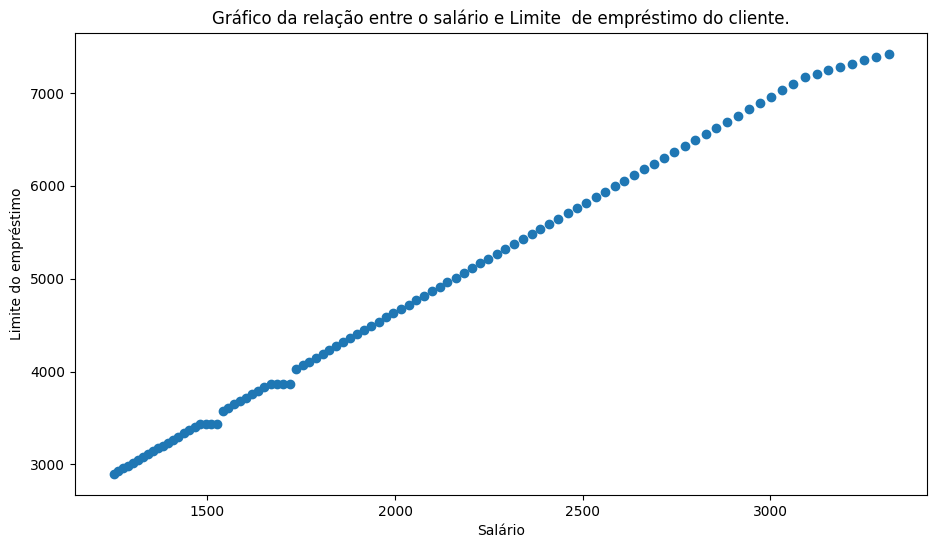

In [282]:
#scatter é função de um gráfico
plt.figure(figsize=(11,6))
plt.scatter(Eixo_x,Eixo_y);
# coloca ; no fim para remover o nome  <matplotlib.collections.PathCollection at 0x1f95aa24190>
plt.title('Gráfico da relação entre o salário e Limite  de empréstimo do cliente.')
plt.xlabel('Salário')
plt.ylabel('Limite do empréstimo');

# ANÁLISE EXPLORATÓRIA DE DADOS

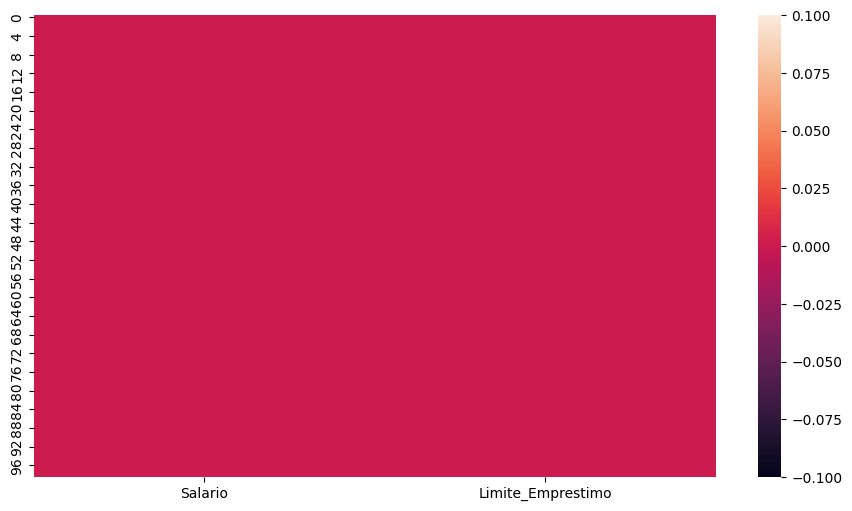

In [283]:
plt.figure(figsize=(11,6))
sns.heatmap(Dados.isnull());
#isnull detecta qualquer valor nulo, se tivesse algum ia ter um risco branco no gráfico



---

Heatmap permite identificar de forma rápida e visual quais colunas e linhas do seu conjunto de dados têm valores ausentes, facilitando a análise e o tratamento dos dados nulos.

---

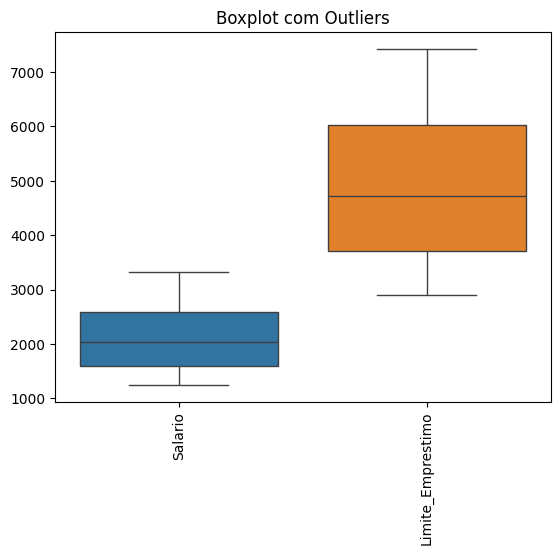

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o boxplot e configurando a aparência dos outliers
sns.boxplot(data=Dados, flierprops=dict(marker='o', color='red', markersize=8))  # Personalizando os outliers
plt.xticks(rotation=90)  # Rotacionar os labels do eixo x
plt.title('Boxplot com Outliers')
plt.show()


  
## Quartis e Bigodes no Boxplot

1. **Q1 (Primeiro Quartil ou 25º Percentil)**:
   Este quartil divide os **25%** inferiores dos dados. Ou seja, **25% dos dados** estão abaixo de **Q1**. Em um boxplot, ele é representado pela **borda inferior da caixa**.

2. **Q2 (Mediana ou 50º Percentil)**:
   A **mediana** divide os dados ao meio. **50% dos dados** estão abaixo da mediana e **50% estão acima**. Em um boxplot, a mediana é representada pela **linha dentro da caixa**.

3. **Q3 (Terceiro Quartil ou 75º Percentil)**:
   Este quartil divide os **25%** superiores dos dados. Ou seja, **75% dos dados** estão abaixo de **Q3**. No boxplot, ele é representado pela **borda superior da caixa**.

4. **Bigodes (Limites Inferior e Superior)**:
   Os **bigodes** do boxplot se estendem desde a borda da caixa até o valor máximo e mínimo dentro de um limite aceitável. Esse limite é normalmente definido como **1.5 vezes o intervalo interquartil (IQR)**, onde **IQR = Q3 - Q1**.
   
   - **Limite inferior**: 
     \[
     Q1 - 1.5 \times IQR
     \]
   
   - **Limite superior**: 
     \[
     Q3 + 1.5 \times IQR
     \]

As linhas que se estendem da caixa são chamadas de **bigodes**. Elas geralmente se estendem até o valor mais distante que não é considerado um **outlier**.

Se **não há outliers** no boxplot, significa que todos os pontos de dados estão dentro dos limites estabelecidos pelos bigodes.

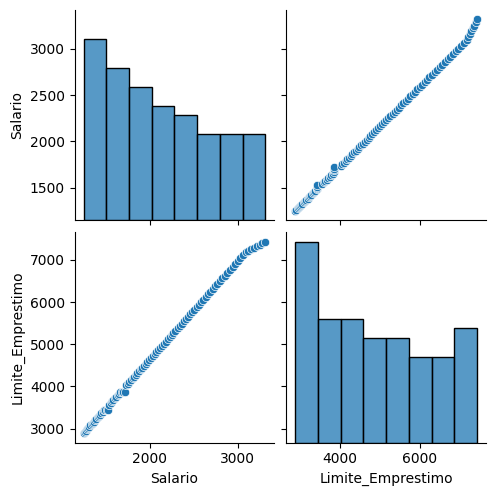

In [ ]:
sns.pairplot(Dados)
# Se a base de dados for muito grande ele demora para rodar 
#pega toda a base de dados e faz um gráfico de dois eixo  para todas as variáveis do seu gráfico 

In [7]:
#corrcoef mostra a correlação entre variáveis
Correlacao=np.corrcoef(Eixo_x,Eixo_y)
Correlacao
#Correlação de 0.99

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

### Correlação próxima de 1

Uma correlação próxima de **1** significa que a relação entre as variáveis é **forte e positiva**. Ou seja:

- **Correlação forte**: As variáveis têm uma relação linear clara e significativa.
- **Correlação positiva**: Quando uma variável aumenta, a outra também tende a aumentar de forma proporcional.

Por exemplo, se temos uma variável **X** (como "salário") e uma variável **Y** (como "limite de crédito"), uma correlação próxima de 1 indicaria que, à medida que o salário aumenta, o limite de crédito também tende a aumentar de forma previsível e proporcional.


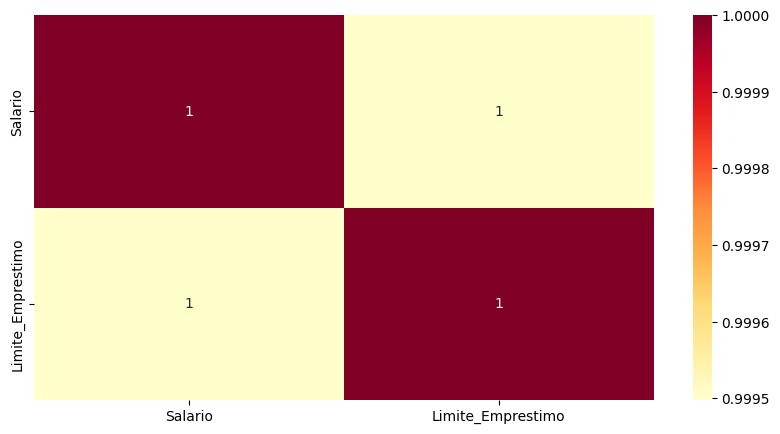

In [ ]:

#annot=true é para mostrar os valores no meio do gráfico
#arredondo a correlação apra 1 
correlacao = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlacao, annot=True, cmap='YlOrRd')
plt.show()

## Divisão dos Dados e Treinamento do Modelo

Antes de treinar o modelo, é importante dividir os dados em conjuntos de **treinamento** e **teste**. A divisão garante que o modelo seja treinado em uma parte dos dados e avaliado em outra parte, evitando overfitting e permitindo uma melhor generalização.

### Passos para a Divisão dos Dados:

1. **Dividir os dados em variáveis independentes (X) e dependentes (Y)**:
   - `X` é a variável independente  (`Salario`).
   - `Y` é a variável dependente  (`Limite_Emprestimo`).

2. **Dividir os dados em conjunto de treinamento e teste**:
   - Utilizamos a função `train_test_split` para dividir os dados em dois conjuntos: **75% para treinamento** e **25% para teste**.


In [ ]:


x_treino,x_teste,y_treino,y_teste= train_test_split(
    Eixo_x,
    Eixo_y,
    random_state=15, #é para garantir que sempre vai passar as mesmas linas para treinar o model, pode ser qualquer número
    test_size=0.75 # 25% dos dados vai ser usado para teste e 75% para 
    
)



In [5]:
print(len(x_treino), len(x_teste))
#Tinha 99 linhas, agora tem 74 linhas para treino e 25 para teste 

24 75


In [18]:
#reshape vai converter para formado de matriz, estava em formato de lista 
Eixo_x=Eixo_x.reshape(-1,1) #  o -1 é para indicar que não quer que use as linhas, só as colunas 
Eixo_y=Eixo_y.reshape(-1,1)


In [ ]:


Func_Regressao = LinearRegression()

#fit é para passar os dados para a função de regressão linear
Func_Regressao.fit(x_treino,y_treino)


R$ 4.163,61


In [28]:
#Criação da variável Previsõoes
Previsoes =Func_Regressao.predict(x_teste) 

In [31]:
# Avaliar o modelo
variance_Limite = np.var(y_teste)
print(f'Variância do Limite de empréstimo: {variance_Limite}')



Variância do Limite de empréstimo: 1971421.407702651


In [32]:
variance_Salario = np.var(x_teste)
print(f'Variância dos  salários: {variance_Salario}')

Variância dos  salários: 377248.5651248867


In [41]:
#calcula o quando as variaves se explicaram, muito proximo da correlação  
# Mede o quanto o modelo de regressão linear explica a variação nos dados de entrada em relação à variável dependente (valor real
Func_Regressao.score(x_treino,y_treino)


0.9992569505276141

In [340]:


mse = mean_squared_error(y_teste, Previsoes)  #avalia se y_teste ficou proxim das previssões 
print(f'Mean Squared Error: {mse}')

print ('RMSE(Mean Squared Error)',np.sqrt( metrics.mean_squared_error(y_teste,Previsoes))) #avalia se  o y_teste ficou proximo das previssões 

R2 = r2_score(y_teste, Previsoes)
print(f'R² Score: {R2}')


Mean Squared Error: 2956.803071813228
RMSE(Mean Squared Error) 54.37649374328238
R² Score: 0.9985001669048228


In [233]:
# Avaliar o modelo
variance = np.var(y_teste)
print(f'Variância dos Valores Reais: {variance}')

Variância dos Valores Reais: 1971421.407702651


In [285]:
# Exibindo os coeficientes e intercepto do modelo
print('Coeficiente:', Func_Regressao.coef_[0])
print('Intercepto:', Func_Regressao.intercept_)


Coeficiente: [2.33066116]
Intercepto: [-31.57800748]


# RESULTADOS

- **Variância de y_teste** indica a dispersão dos dados reais do limite de emprestimo.

- **R² Score**: Um valor elevado de R² indica que o modelo consegue explicar a maior parte da variação dos limites de crédito com base no salário.

- **MSE (Erro Quadrático Médio)** e **RMSE (Raiz do Erro Quadrático Médio)**: Esses valores estão relativamente baixos, o que sugere que os erros do modelo são pequenos, indicando uma boa capacidade do modelo em prever os valores com precisão.

- **Coeficiente e Intercepto**: Os valores do coeficiente e do intercepto estão de acordo com a relação esperada entre o salário e o limite de crédito, o que confirma que o modelo capturou corretamente a tendência entre as duas variáveis.



In [303]:
for coluna in Dados.columns:
    media = Dados[coluna].mean()
    moda = Dados[coluna].mode()[0]
    mediana = Dados[coluna].median()
    desvio_padrao = Dados[coluna].std()  # Calculando o desvio padrão

    print(f"Coluna: {coluna}")
    print(f"Média: {media}")
    print(f"Moda: {moda}")
    print(f"Mediana: {mediana}")
    print(f"Desvio Padrão: {desvio_padrao}")
    print("-" * 40)


Coluna: Salario
Média: 2119.1005813894876
Moda: 1250.21913
Mediana: 2035.792243045518
Desvio Padrão: 600.8329833362092
----------------------------------------
Coluna: Limite_Emprestimo
Média: 4900.652059560774
Moda: 3434.630087261334
Mediana: 4722.412622682419
Desvio Padrão: 1378.1139612151221
----------------------------------------


In [331]:
variance_salario = np.var(x_teste)
print(f'Variância do Salário: {variance_salario}')
desvio_padrao_salario = np.sqrt(variance_salario)
print(f'Desvio Padrão do Salário: {desvio_padrao_salario}')

Variância do Salário: 377248.5651248867
Desvio Padrão do Salário: 614.205637490317


In [330]:
# Avaliar o modelo
variance_limite = np.var(y_teste)
print(f'Variância de limite de empréstimo: {variance_limite}')
desvio_padrao_limite = np.sqrt(variance_limite)
print(f'Desvio Padrão do limite de empréstimo: {desvio_padrao_limite}')


Variância de limite de empréstimo: 1971421.407702651
Desvio Padrão do limite de empréstimo: 1404.0731489857112



---
### Outra forma de calcular
### Cálculo do Desvio Padrão de limite_emprestimo

O **desvio padrão** é a raiz quadrada da **variância**.

#### Cálculo do Desvio Padrão:

$$
\text{Desvio Padrão} = \sqrt{\text{Variância}} = \sqrt{1971421.407702651} \approx 1404.02
$$

Isso significa que, em média, os valores reais estão, aproximadamente, **1404.02 R$** afastados da média de **4900.65 R$**, ou seja, essa é a medida da dispersão dos valores em torno da média.

---


In [ ]:
#Definição dos resíduos
residuos = y_teste - Previsoes

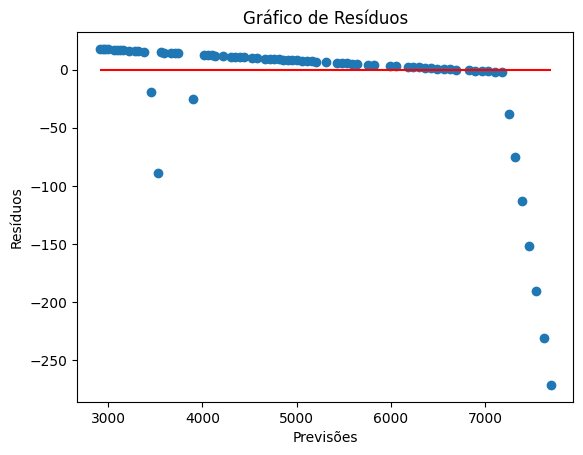

In [ ]:

# Gráfico de Resíduos
plt.scatter(Previsoes, residuos)
plt.hlines(0, xmin=min(Previsoes), xmax=max(Previsoes), colors='red')  # Linha horizontal em y=0
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.show()

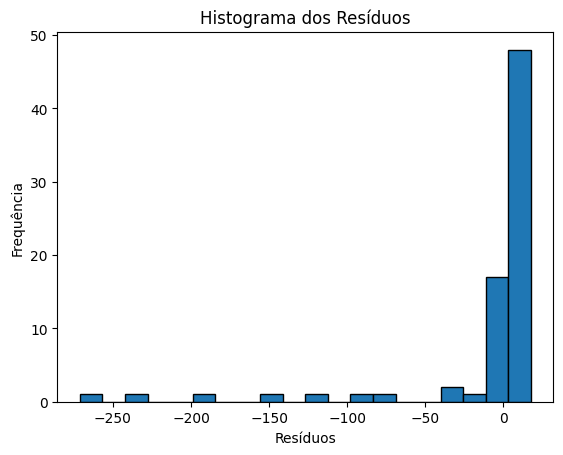

In [308]:
plt.hist(residuos, bins=20, edgecolor='black')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()


### Resíduos do Modelo

- **Resíduo** = Yreal - Yprevisto

Em um modelo perfeito, todos os resíduos seriam iguais a **0**.

### Gráfico de Resíduos

O gráfico de resíduos é uma ferramenta importante para verificar se o modelo está adequado aos dados. Se o modelo estiver fazendo boas previsões, os resíduos devem ser:

- Distribuídos **aleatoriamente** em torno de **zero**.
- Sem padrões ou tendências visíveis, indicando que o modelo capturou adequadamente a relação entre as variáveis.

Esse gráfico ajuda a identificar problemas como:
- **Heterocedasticidade** (variação não constante dos resíduos).
- **Padrões sistemáticos** nos erros de previsão.

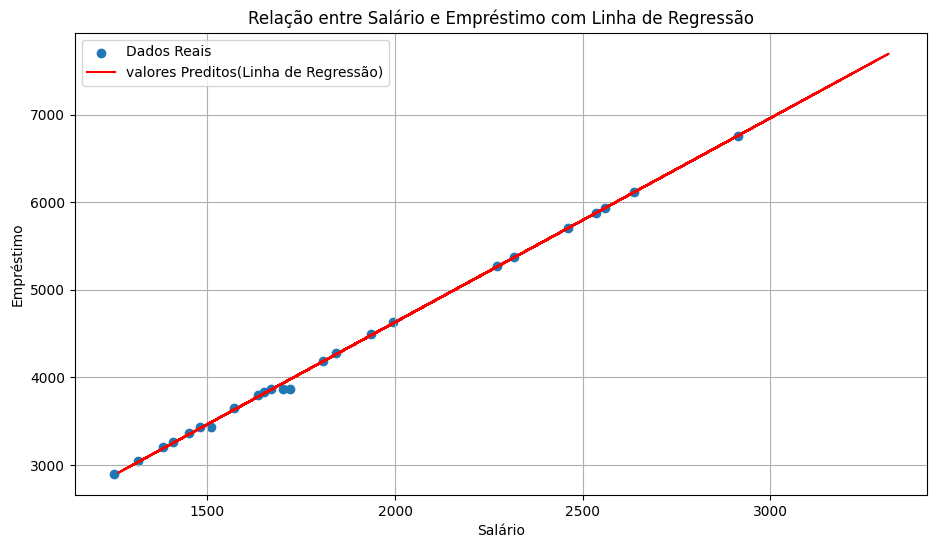

In [34]:
plt.figure (figsize=(11,6))
plt.scatter(x_treino, y_treino, label="Dados Reais")
plt.plot(x_teste, Previsoes, color='red', label="valores Preditos(Linha de Regressão)")
plt.xlabel("Salário")
plt.ylabel("Empréstimo")
plt.title("Relação entre Salário e Empréstimo com Linha de Regressão")
plt.legend()
plt.grid(True)
plt.show()             
     #.plot é o gráfico de linha
     #predict faz previssão de valores 

Previsões de limite com os seguintes salários: 

In [35]:
import locale

# Definir o local para o Brasil (onde usamos o ponto como separador de milhar)
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

print(f'R$ {locale.format_string("%.2f", Func_Regressao.predict([[1800]])[0][0], grouping=True)}')
print(f'R$ {locale.format_string("%.2f", Func_Regressao.predict([[3400.55]])[0][0], grouping=True)}')
print(f'R$ {locale.format_string("%.2f", Func_Regressao.predict([[7810.55]])[0][0], grouping=True)}')


R$ 4.163,61
R$ 7.893,95
R$ 18.172,17
